In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import mrcfile
from scipy import fftpack, interpolate, linalg, ndimage
%matplotlib inline

In [117]:
def project_fst(rho):
    """
    input is rho, a 3D volume
    returns an image
    """
    #calculate fft of rho
    rho_hat = np.fft.fftshift(np.fft.fftn(rho))
    real_rhoh = rho_hat.real
    imag_rhoh = rho_hat.imag
    
    #generate a and b, orthonormal
    a = [1,0,0]
    b = [0,1,0]
    
#     #rotate rho_hat
#     rot_matrix = np.array([a, b, np.cross(a, b)])
#     rot_matrix.shape = (3, 3) #change to square matrix
#     inv_rot_matrix = np.linalg.inv(rot_matrix) #invert the matrix
#     inv_rot_matrix.shape = (3, 1, 3) #reshape

    new_coord = [a, b, np.cross(a, b)]
    #transform
    rot_real_rhoh = ndimage.interpolation.map_coordinates(real_rhoh, new_coord)
    rot_imag_rhoh = ndimage.interpolation.map_coordinates(imag_rhoh, new_coord)
    
    #generate eta
    etax, etay = np.meshgrid(np.linspace(-N/2 + 1, N/2 - 1, N), np.linspace(-N/2 + 1, N/2 -  1, N), indexing='ij')
    etax = etax[..., np.newaxis]
    etay = etay[..., np.newaxis]
    grid = etax * a + etay * b #200x200x3
    
    #interpolate
    rho_hat_f = interpolate.RegularGridInterpolator(points=[x, y], values=rot_real_rhoh)
    result = rho_hat_f(grid)

    return np.fft.ifft(complexform)

In [68]:
def rgi_project_fst(rho, a, b):
    """
    RGI method
    """
    rho_hat = np.fft.fftshift(np.fft.fftn(rho))
    N = len(rho)
    
    etax, etay = np.meshgrid(np.arange(-(N-1)/2 , (N-1)/2 + 1, dtype=int), np.arange(-(N-1)/2, (N-1)/2 + 1, dtype=int), indexing='ij')
    etax = etax[..., np.newaxis]
    etay = etay[..., np.newaxis]
    
    grid = etax * a + etay * b #200x200x3
    
    wx, wy, wz = np.meshgrid(np.arange(-(N-1)/2 , (N-1)/2 + 1, dtype=int), np.arange(-(N-1)/2 , (N-1)/2 + 1, dtype=int), np.arange(-(N-1)/2 , (N-1)/2 + 1, dtype=int))
    
#     rho_hat = ((-1)**np.abs((wx + wy + wz))) * 1/N**3 * rho_hat
    rho_hat = np.exp(np.pi * 1j * (wx + wy + wz)) / N**3 * rho_hat
#     print(((-1)**np.abs((wx + wy + wz))))

    x = np.arange(-(N-1)/2, (N-1)/2+1)
    y = np.arange(-(N-1)/2, (N-1)/2+1)
    z = np.arange(-(N-1)/2, (N-1)/2+1)

    
    rho_hat_f = interpolate.RegularGridInterpolator(points=[x, y, z], values=rho_hat, bounds_error=False, fill_value=0)
    result = rho_hat_f(grid)
    
#     result = ((-1)**np.abs((etax[...,0] + etay[...,0] + 1)))*N**2*result
    result = np.exp(-np.pi * 1j * (etax[..., 0] + etay[..., 0]))* N**2 * result
    image = np.fft.ifftn(np.fft.ifftshift(result))
    
#     print(np.linalg.norm(np.imag(image)))

    return image.real

In [2]:
zika_small = mrcfile.open('zika_153.mrc')
small_rho = zika_small.data

In [3]:
len(small_rho)

153

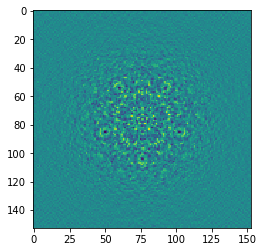

In [177]:
plt.imshow(small_rho[0])

In [ ]:
a = 2*np.random.rand(3)-1
b = np.cross(a, 2*np.random.rand(3)-1)
a = a/np.linalg.norm(a)
b = b/np.linalg.norm(b)
test = rgi_project_fst(small_rho, a, b)
plt.imshow(test)

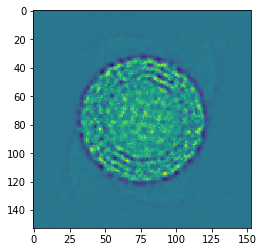

In [69]:
a = 2*np.random.rand(3)-1
b = np.cross(a, 2*np.random.rand(3)-1)
a = a/np.linalg.norm(a)
b = b/np.linalg.norm(b)
test = rgi_project_fst(small_rho, a, b)
# test.shape
plt.imshow(test)

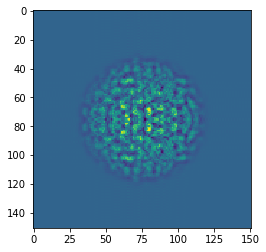

In [6]:
a = [1,0,0]
b = [0,1,0]
test = rgi_project_fst(small_rho, a, b)
plt.imshow(test)

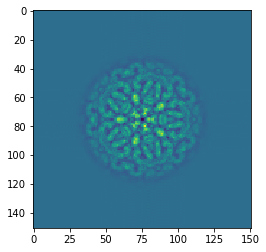

In [7]:
a = [0,0,1]
b = [0,1,0]
test = rgi_project_fst(small_rho, a, b)
plt.imshow(test)

In [40]:
copy = rho[:50,:50,:50]


In [4]:
import mrcfile
zika_file = mrcfile.open('emd_8116.map')

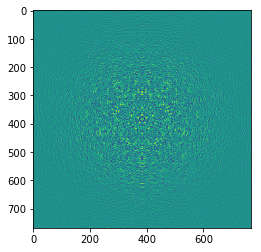

In [5]:
rho = zika_file.data
plt.imshow(rho[0])

In [ ]:
#np.fft.fftfreq(n) returns an array giving the frequencies of corresponding elements in the output
#np.fft.fftshift(A) shifts transforms and their frequencies to put the zero-frequency components in the middle,
#and np.fft.ifftshift(A) undoes that shift